In [142]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from math import log
from CIoTS import *

In [144]:
dimensions = 3
max_p = 4
incoming_edges = 2

In [145]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000, incoming_edges=incoming_edges)
ts = generator.generate()

In [146]:
predicted_graph1 = pc_chen(partial_corr_test, ts, 4, 0.05)
predicted_graph2 = pc_chen_modified(partial_corr_test, ts, 4, 0.05)

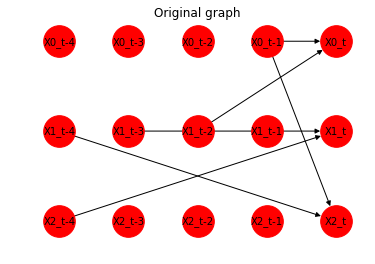

In [147]:
plt.title('Original graph')
generator.draw_graph()

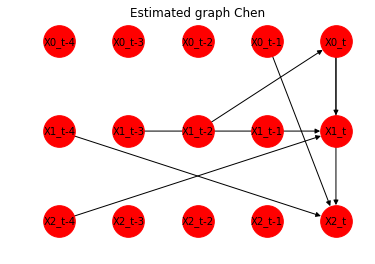

In [148]:
plt.title("Estimated graph Chen")
draw_graph(predicted_graph1, dimensions, max_p)

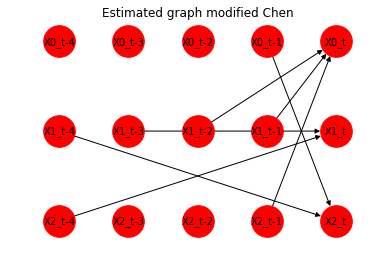

In [149]:
plt.title("Estimated graph modified Chen")
draw_graph(predicted_graph2, dimensions, max_p)

In [150]:
pd.DataFrame(evaluate_edges(generator.graph, predicted_graph1), index=[0])

,FDR,FPR,TPR,accuracy,f1-score,matthews_corrcoef,precision
0,0.285714,0.009804,0.833333,0.985714,0.769231,0.764316,0.714286


In [151]:
pd.DataFrame(evaluate_edges(generator.graph, predicted_graph2), index=[0])

,FDR,FPR,TPR,accuracy,f1-score,matthews_corrcoef,precision
0,0.285714,0.009804,0.833333,0.985714,0.769231,0.764316,0.714286


In [152]:
p_ranking, ic_scores = var_order_select(ts, max_p=9, drop=False)

In [153]:
pd.DataFrame(p_ranking)

,aic,bic,hqic
0,7,7,7
1,10,10,10
2,5,5,5
3,9,9,9
4,6,6,6
5,8,8,8
6,4,4,4
7,3,3,3
8,2,2,2
9,1,1,1


In [154]:
pd.DataFrame(ic_scores)

,aic,bic,hqic
0,-inf,-inf,-inf
1,-inf,-inf,-inf
2,-72.779947,-72.745307,-72.768221
3,-72.772054,-72.711435,-72.751534
4,-72.084633,-72.043498,-72.070708
5,-71.857779,-71.803655,-71.839457
6,-71.395644,-71.367499,-71.386116
7,-4.368056,-4.346406,-4.360727
8,-2.808418,-2.793263,-2.803288
9,-1.303398,-1.294738,-1.300466
